In [1]:
import random
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
#import pingouin
from datetime import datetime
from matplotlib.pyplot import figure


In [2]:
zrent = pd.read_csv("./data/clean/zrentals.csv")


zrent["zip_code"] = zrent["zip_code"].apply(int)
zrent["date"] = pd.to_datetime(zrent["date"])
zrent["borough"] = zrent["borough"].apply(str)
zrent["city"] = zrent["city"].apply(str)
zrent["mean_rent"] = zrent["mean_rent"].apply(float)
zrent = zrent.rename(columns={"mean_rent" : "zillow_mean_rent"})
zrent

,zip_code,state,city,borough,date,zillow_mean_rent
0,11385,NY,New York,QUEENS,2015-03-31,2216
1,10467,NY,New York,BRONX,2015-03-31,1303
2,11226,NY,New York,BROOKLYN,2015-03-31,1909
3,11220,NY,New York,BROOKLYN,2015-03-31,1686
4,11207,NY,New York,BROOKLYN,2015-03-31,2113
...,...,...,...,...,...,...
8731,10282,NY,New York,MANHATTAN,2022-10-31,7836
8732,10069,NY,New York,MANHATTAN,2022-10-31,5778
8733,10004,NY,New York,MANHATTAN,2022-10-31,4823
8734,10006,NY,New York,MANHATTAN,2022-10-31,4180


In [3]:
trulia = pd.read_csv("./data/clean/trulia.csv")
trulia = trulia.rename(columns={"County": "borough", "Address": "address", "Zip":"zip_code",
                                "Listing Url": "listing_url", "price" : "trulia_rent_price"})
trulia["zip_code"] = zrent["zip_code"].apply(int)
trulia["borough"] = zrent["borough"].apply(str)
#trulia["trulia_rent_price"] = trulia["trulia_rent_price"].dropna()
#trulia["address"] = zrent["address"].apply(str)
trulia = trulia.dropna(subset=['trulia_rent_price'])

trulia

,address,borough,zip_code,trulia_rent_price,listing_url,Borough
0,"2600 Netherland Ave Bronx, NY 10463",QUEENS,11385,2245.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
1,"2600 Netherland Ave Bronx, NY 10463",BRONX,10467,2600.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
2,"2600 Netherland Ave Bronx, NY 10463",BROOKLYN,11226,3675.0,https://www.trulia.com/c/ny/bronx/the-century-...,Bronx
3,"939 Woodycrest Ave Bronx, NY 10452",BROOKLYN,11220,1581.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
4,"939 Woodycrest Ave Bronx, NY 10452",BROOKLYN,11207,1904.0,https://www.trulia.com/c/ny/bronx/noonan-tower...,Bronx
...,...,...,...,...,...,...
1039,"1 Eagle St Brooklyn, NY 11222",BROOKLYN,11237,7885.0,https://www.trulia.com/c/ny/brooklyn/eagle-wes...,Brooklyn
1040,"1 Eagle St Brooklyn, NY 11222",MANHATTAN,10028,11690.0,https://www.trulia.com/c/ny/brooklyn/eagle-wes...,Brooklyn
1041,"377 E 33rd St Manhattan, NY 10016",BROOKLYN,11228,3715.0,https://www.trulia.com/c/ny/new-york/the-lanth...,Queens
1042,"377 E 33rd St Manhattan, NY 10016",BROOKLYN,11205,4247.0,https://www.trulia.com/c/ny/new-york/the-lanth...,Queens


In [4]:
zmean_rent_data = zrent[['zip_code', 'borough', 'zillow_mean_rent']]
trulia_price_data = trulia[['zip_code', 'borough', 'trulia_rent_price']]

In [5]:
mean_rent_grouped = mean_rent_data.groupby(['zip_code', 'borough'])
price_grouped = price_data.groupby(['zip_code', 'borough'])

NameError: name 'mean_rent_data' is not defined

In [ ]:
def top_n(df, n, column):
    return df.nlargest(n, column)

top_mean_rent = mean_rent_grouped.apply(top_n, n=5, column='mean_rent')
top_price = price_grouped.apply(top_n, n=5, column='price')

In [ ]:
plt.plot(top_mean_rent['zip_code'], top_mean_rent['mean_rent'], label='Zillo Mean Rent')
plt.plot(top_price['zip_code'], top_price['price'], label='Trulia Rent Price')
plt.legend()
plt.show()

In [6]:
zillowtrulia = pd.merge(zmean_rent_data, trulia_price_data, on=['zip_code', 'borough'], how='inner')


In [7]:
#zillowtrulia = zillowtrulia.dropna(subset=[''])

In [10]:
# drop duplicate columns
zillowtrulia = zillowtrulia.drop_duplicates(subset='zip_code')

In [11]:
zillowtrulia

,zip_code,borough,zillow_mean_rent,trulia_rent_price
0,11385,QUEENS,2216,2245.0
1196,10467,BRONX,1303,2600.0
2392,11226,BROOKLYN,1909,3675.0
3588,11220,BROOKLYN,1686,1581.0
4784,11207,BROOKLYN,2113,1904.0
...,...,...,...,...
92623,11109,QUEENS,2790,2355.0
93727,11223,BROOKLYN,1514,3470.0
94819,10034,MANHATTAN,1827,5810.0
95620,10280,MANHATTAN,3430,3088.0


In [14]:
averages = zillowtrulia.groupby('borough')['zillow_mean_rent','trulia_rent_price'].mean().reset_index()

/var/folders/2r/0fj15shj34z2mbldl18cp9kc0000gp/T/ipykernel_2972/298806855.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = zillowtrulia.groupby('borough')['zillow_mean_rent','trulia_rent_price'].mean().reset_index()


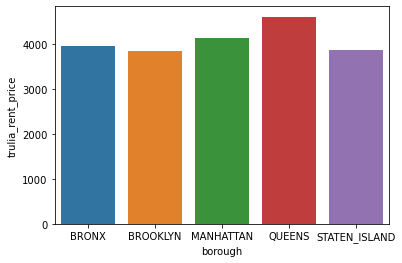

In [15]:

sns.barplot(data=averages, x='borough', y='trulia_rent_price')
plt.show()

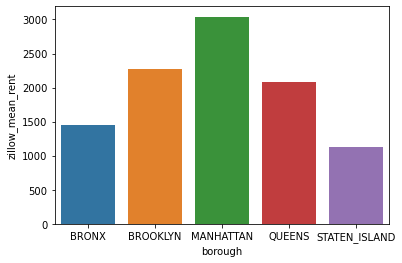

In [16]:
sns.barplot(data=averages, x='borough', y='zillow_mean_rent')
plt.show()

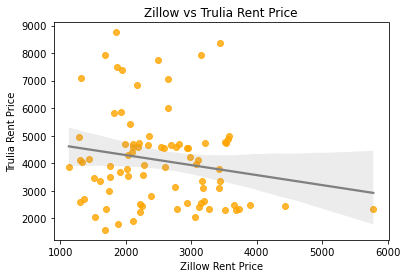

In [22]:
sns.regplot(data=zillowtrulia, x='zillow_mean_rent', y='trulia_rent_price',scatter_kws={"color": "orange"}, line_kws={"color" : "grey"})
plt.xlabel('Zillow Rent Price')
plt.ylabel('Trulia Rent Price')
plt.title("Zillow vs Trulia Rent Price")
plt.show()

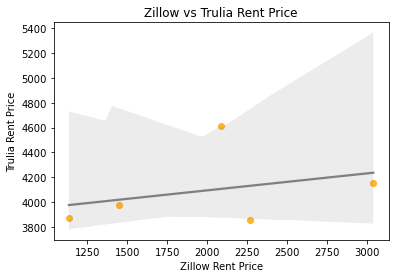

In [23]:
sns.regplot(data=averages, x='zillow_mean_rent', y='trulia_rent_price',scatter_kws={"color": "orange"}, line_kws={"color" : "grey"})
plt.xlabel('Zillow Rent Price')
plt.ylabel('Trulia Rent Price')
plt.title("Zillow vs Trulia Rent Price")
plt.show()

Analyzing the chart below, the homes with a value of approximately 500,000 usd have the most listings on airbnb. Although appealing homes that cross the 2 million threshold are very few, less than 250

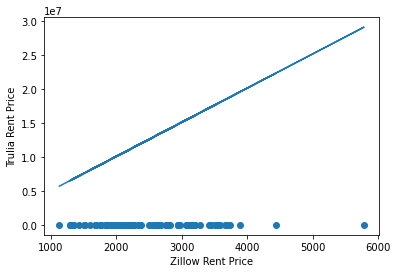

In [19]:
import matplotlib.pyplot as plt
from numpy import polyfit

x = zillowtrulia['zillow_mean_rent']
y = zillowtrulia['trulia_rent_price']

b, m = polyfit(x, y, 1)
plt.scatter(x, y)
plt.plot(x, b + m * x, '-')
plt.xlabel('Zillow Rent Price')
plt.ylabel('Trulia Rent Price')
plt.show()

In [12]:
columns_to_keep1 = ["zip_code","mean_rent","borough","date"]
columns_to_keep2 = ["zip_code","price","borough"]
# Merge the DataFrames and drop unnecessary columns
zillow_trulia = pd.merge(zrent[columns_to_keep1], trulia[columns_to_keep2], on=["zip_code","borough"])
zillow_trulia = zillow_trulia.dropna()

KeyError: "['mean_rent'] not in index"

In [ ]:
zillow_trulia.sample(50)

In [ ]:
pivot_table = zillow_trulia.pivot_table(index="date", columns="borough", values="mean_rent")

print(pivot_table)

In [ ]:


avg_prices = zillow_trulia.groupby(["zip_code"])[["mean_rent", "price"]].mean()
avg_prices["mean_rent"] = avg_prices["mean_rent"].apply(int)
avg_prices = avg_prices.dropna()
# Sort the DataFrame by the mean rent in descending order
avg_prices = avg_prices.sort_values(by="mean_rent", ascending=False)
avg_prices = avg_prices.sort_values(by="mean_rent", ascending=False)

# Select the top 5 zip codes
top_5 = avg_prices.head(5)

# Create a bar chart comparing the mean rent and home value for the top 5 zip codes
top_5.plot.bar(y = ["mean_rent", "price"])

plt.legend(["zillow Mean rent", "Trulia Mean Rent"])

plt.xlabel("Top 5 Zip Codes", fontsize=12, fontstyle="italic", color="purple")
plt.ylabel("Rent Price in thousands", fontsize=12, fontstyle='italic', color="brown")
plt.title("Average Rent from Trulia and Zillow by Zip Code", fontsize=16, fontstyle="italic", color="brown")

In [ ]:
df1 = zrent["mean_rent"].sort_values(ascending =False)
df1

In [ ]:
df2 = trulia["price"].sort_values(ascending =False)
df2

In [ ]:
zrent.groupby(["zip_code"]).count()["mean_rent"].sort_values(ascending=False).head(5)

In [ ]:
# Calculate the mean rent and price for each data frame
mean_rent_1 = trulia.groupby('borough')['price'].mean()
mean_price_1 = trulia.groupby('borough')['price'].mean()
mean_rent_2 = zrent.groupby('borough')['mean_rent'].mean()
mean_price_2 = zrent.groupby('borough')['mean_rent'].mean()

# Sort the mean rent and price in descending order
mean_rent_1 = mean_rent_1.sort_values(ascending=False)
mean_price_1 = mean_price_1.sort_values(ascending=False)
mean_rent_2 = mean_rent_2.sort_values(ascending=False)
mean_price_2 = mean_price_2.sort_values(ascending=False)

# Plot the mean rent and price for each data frame on separate graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(mean_price_1, 'b', label='price')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Price per listing in thousands')
ax1.set_title('Trulia price of Rent per Boro')
ax1.legend()
ax1.set_xticklabels(mean_rent_1.index, rotation=45)

ax2.plot(mean_price_2, 'pink', label='mean_rent')
ax2.set_xlabel('Borough')
ax2.set_ylabel('Mean Rent in thousands')
ax2.set_title('Zillow Mean Rent per Boro')
ax2.legend()
ax2.set_xticklabels(mean_rent_2.index, rotation=45)
plt.show()


In [ ]:
mean_rent = zrent.groupby(['borough','zip_code'])['mean_rent'].mean()
mean_price = trulia.groupby(['borough','zip_code'])['price'].mean()

# Create a new DataFrame with the borough, zip code, and mean rent and price
data = pd.DataFrame({'borough': mean_rent.index.get_level_values(0), 
                     'zip_code': mean_rent.index.get_level_values(1), 
                     'rent': mean_rent, 
                     'price': mean_price})

# Create the correlation heat map
sns.heatmap(data.corr(), annot=True)

# Show the plot
plt.show()

# Pivot the DataFrame to create a matrix with the boroughs and zip codes as rows and columns


In [ ]:
mean_rent = zrent.groupby(['borough', 'zip_code'])['mean_rent'].mean()
mean_price = trulia.groupby(['borough', 'zip_code'])['price'].mean()

# Create a new DataFrame with the borough, zip code, and mean rent and price
data = pd.DataFrame({'borough': mean_rent.index.get_level_values(0), 
                     'zip_code': mean_rent.index.get_level_values(1), 
                     'rent': mean_rent, 
                     'price': mean_price})

# Pivot the DataFrame to create a matrix with the boroughs and zip codes as rows and columns
#pivoted = data.pivot_table(index=['borough', 'zip_code'], columns=['zip_code', 'borough'], values=['rent', 'price'])

# Create the correlation heat map
sns.heatmap(data.corr(),cmap = 'coolwarm', annot=True)

# Add a title and labels to the plot
plt.title('Correlation Heat Map')
plt.xlabel('Zip Code')
plt.ylabel('Borough')

# Show the plot
plt.show()



In [ ]:
#zrent_max = zrent.groupby(["zip_code"] == "10007").max() 

zrent[zrent["zip_code"] == 10007].groupby("zip_code").count() 




In [ ]:
avg_prices = avg_prices.sort_values(by="mean_rent", ascending=False)

# Select the top 5 zip codes
last_5 = avg_prices.tail(5)

last_5.plot.bar(y = ["mean_rent", "price"])

plt.legend(["zillow Mean rent", "Trulia Mean Rent"])

plt.xlabel("Lowest 5 Zip Codes", fontsize=12, fontstyle="italic", color="purple")
plt.ylabel("Rent Price in thousands", fontsize=12, fontstyle='italic', color="brown")
plt.title("Average Rent from Trulia and Zillow by Zip Code", fontsize=16, fontstyle="italic", color="brown")